In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [ ]:
import os, cv2, random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from random import shuffle 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
%matplotlib inline 
import tensorflow as tf

In [ ]:
!unzip /content/drive/MyDrive/test_data_224.zip -d /content/drive/MyDrive/dogs_cats/

Archive:  /content/drive/MyDrive/test_data_224.zip
replace /content/drive/MyDrive/dogs_cats/test_data_224.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!unzip /content/drive/MyDrive/train_data_224.zip -d /content/drive/MyDrive/dogs_cats/

Archive:  /content/drive/MyDrive/train_data_224.zip
  inflating: /content/drive/MyDrive/dogs_cats/train_data_224.npy  


In [ ]:
TEST_SIZE = 0.5
RANDOM_STATE = 2020
BATCH_SIZE = 64
NO_EPOCHS = 10
NUM_CLASSES = 2
IMG_SIZE = 224

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
from keras.models import Model

In [ ]:
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
train_data = np.load('/content/drive/MyDrive/dogs_cats/train_data_224.npy',allow_pickle=True)
test_data = np.load('/content/drive/MyDrive/dogs_cats/test_data_224.npy',allow_pickle=True)

In [ ]:
X = np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y = np.array([i[1] for i in train_data])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [ ]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/10
196/196 [==============================] - 157s 715ms/step - loss: 1.6679 - accuracy: 0.9546 - val_loss: 1.5459 - val_accuracy: 0.9595
Epoch 2/10
196/196 [==============================] - 143s 729ms/step - loss: 0.5668 - accuracy: 0.9827 - val_loss: 1.5313 - val_accuracy: 0.9706
Epoch 3/10
196/196 [==============================] - 143s 731ms/step - loss: 0.2173 - accuracy: 0.9926 - val_loss: 1.5324 - val_accuracy: 0.9738
Epoch 4/10
196/196 [==============================] - 143s 729ms/step - loss: 0.1349 - accuracy: 0.9943 - val_loss: 1.7177 - val_accuracy: 0.9726
Epoch 5/10
196/196 [==============================] - 143s 729ms/step - loss: 0.0974 - accuracy: 0.9967 - val_loss: 1.7837 - val_accuracy: 0.9738
Epoch 6/10
196/196 [==============================] - 142s 728ms/step - loss: 0.2559 - accuracy: 0.9934 - val_loss: 2.1186 - val_accuracy: 0.9739
Epoch 7/10
196/196 [==============================] - 142s 729ms/step - loss: 0.0734 - accuracy: 0.9974 - val_loss: 2.0626 -

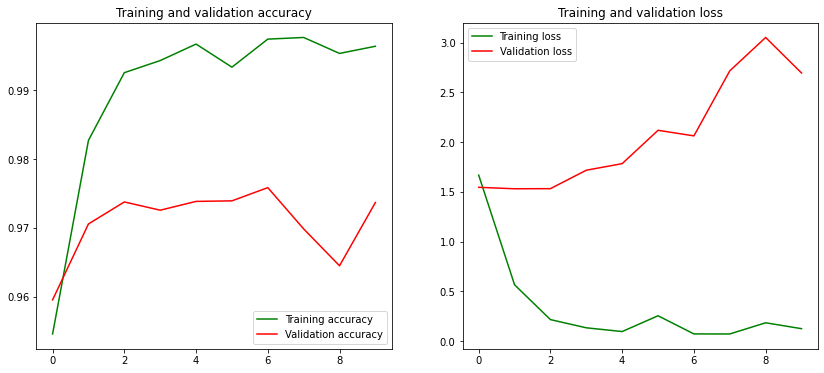

In [ ]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(train_model)

In [ ]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 2.694012403488159
Validation accuracy: 0.9736800193786621


In [ ]:
#get the predictions for the test data
predicted_classes = model.predict(X_val)
#get the indices to) be plotted
y_true = np.argmax(y_val,axis=-1)

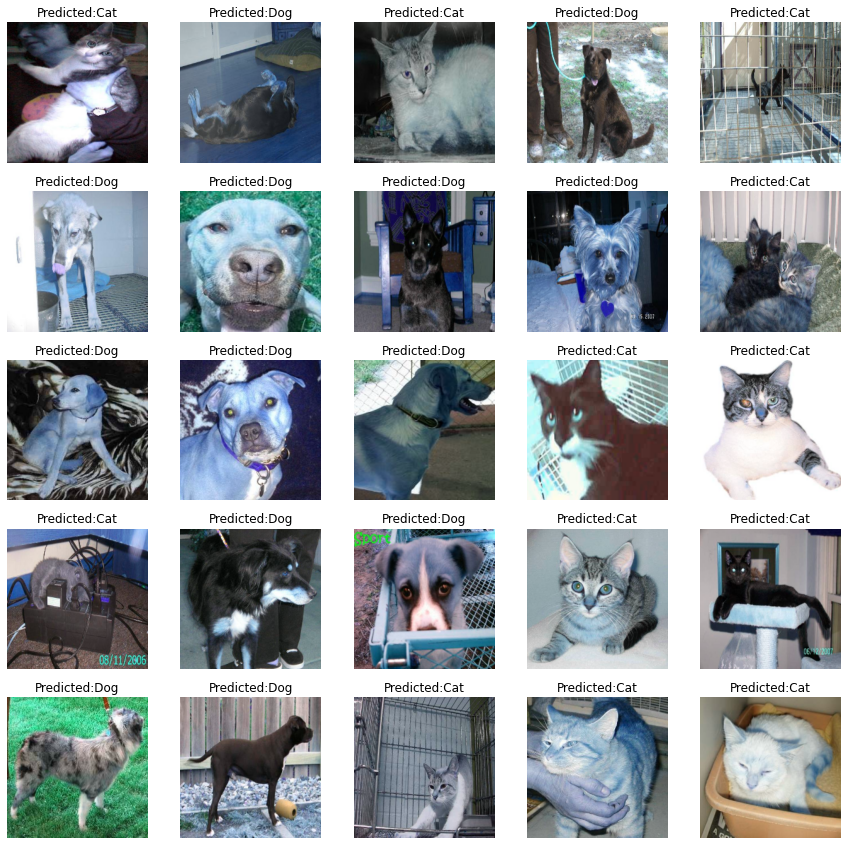

In [ ]:
f, ax = plt.subplots(5,5, figsize=(15,15))
for i,data in enumerate(test_data[:25]):
    img_num = data[1]
    img_data = data[0]
    orig = img_data
    data = img_data.reshape(-1,IMG_SIZE,IMG_SIZE,3)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: 
        str_predicted='Dog'
    else: 
        str_predicted='Cat'
    ax[i//5, i%5].imshow(orig)
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("Predicted:{}".format(str_predicted))    
plt.show()

In [ ]:
pred_list = []
img_list = []
for img in tqdm(test_data):
    img_data = img[0]
    img_idx = img[1]
    data = img_data.reshape(-1,IMG_SIZE,IMG_SIZE,3)
    predicted = (model.predict([data])[0])
    img_list.append(img_idx)
    pred_list.append(round(predicted[1]))

100%|██████████| 12500/12500 [12:06<00:00, 17.20it/s]


In [ ]:
submission = pd.DataFrame({'id':img_list , 'label':pred_list})
submission.head()
submission.to_csv("submission_vgg19.csv", index=False)